In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [2]:
def threshold_local(image, block_size=3, method='gaussian', C=0):
    
    block_size = (block_size,) * image.ndim
    
    block_size = tuple(block_size)
    
    image = image.astype('float64', copy=False)
    thresh_image = np.zeros(image.shape, dtype='float64')
    if method == 'mean':
        # calculate the mean in each block 
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                block = image[i:i+block_size[0], j:j+block_size[1]]
                thresh_image[i,j] = block.mean()
    elif method == 'median':
        # calculate the median in each block 
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                block = image[i:i+block_size[0], j:j+block_size[1]]
                thresh_image[i,j] = np.median(block)
    elif method == 'min_max':
        # calculate the min and max in each block 
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                block = image[i:i+block_size[0], j:j+block_size[1]]
                thresh_image[i,j] = (block.max() - block.min()) / 2

    return thresh_image + C

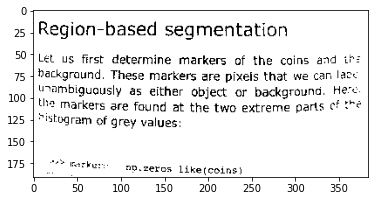

In [7]:
# load the image
image = skimage.io.imread("../Image/page.png", as_gray=True)
binary_image1 = image > threshold_local(image, 15, 'min_max')
plt.imshow(binary_image1, cmap='gray')